In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
!unzip -q "/content/gdrive/MyDrive/Data.zip"

In [9]:
from imutils import paths
import matplotlib.pyplot as plt
import argparse
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [10]:
INIT_LR = 1e-3
EPOCHS = 10
BS = 8
dataset = "/content/Data"

In [11]:
args={}
args["dataset"]=dataset

In [12]:
import numpy as np
import cv2
iPaths = list(paths.list_images(args["dataset"]))  #image paths
data = []
labels = []
for iPath in iPaths:
    label = iPath.split(os.path.sep)[-2]   #split the image paths
    image = cv2.imread(iPath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Convert images into RGB Channel
    image = cv2.resize(image, (224, 224))  #Resizing the images
    data.append(image)
    labels.append(label)
data = np.array(data) / 255.0
labels = np.array(labels)

In [13]:
import os
Data_Dir = "Data//"

In [14]:
Cimages = os.listdir(Data_Dir+"Covid")
Nimages = os.listdir(Data_Dir+"Normal")

Normal Chest X-ray vs Covid-19 Chest X-ray


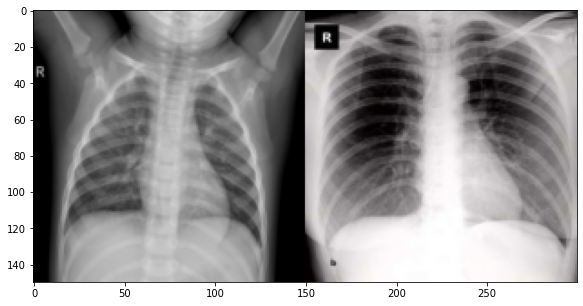

Normal Chest X-ray vs Covid-19 Chest X-ray


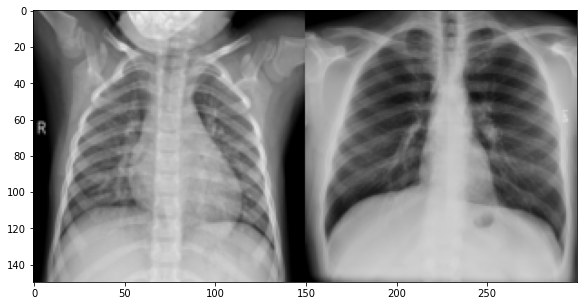

Normal Chest X-ray vs Covid-19 Chest X-ray


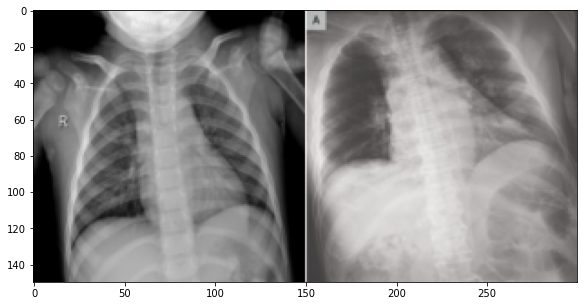

Normal Chest X-ray vs Covid-19 Chest X-ray


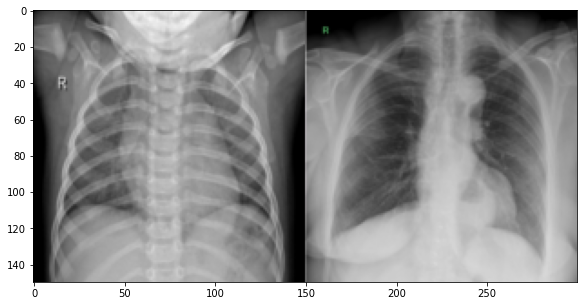

Normal Chest X-ray vs Covid-19 Chest X-ray


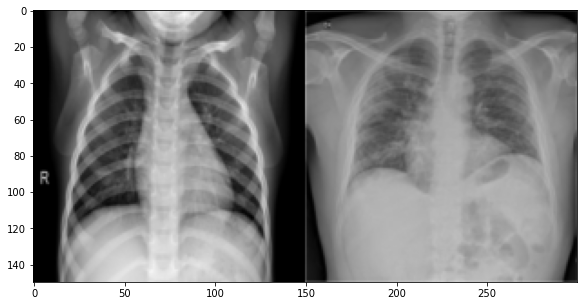

In [18]:
import matplotlib.pyplot as plt
import cv2
import skimage
from skimage.transform import resize
import numpy as np
def plotter(i):
  normal = cv2.imread(Data_Dir+"Normal//"+Nimages[i])
  normal = skimage.transform.resize(normal, (150, 150, 3))
  coronavirus = cv2.imread(Data_Dir+"Covid//"+Cimages[i])
  coronavirus = skimage.transform.resize(coronavirus, (150, 150, 3), mode = 'reflect')
  pair = np.concatenate((normal, coronavirus), axis=1)
  print("Normal Chest X-ray vs Covid-19 Chest X-ray")
  plt.figure(figsize=(10,5))
  plt.imshow(pair)
  plt.show()
for i in range(0,5):
  plotter(i) 

In [19]:
LB = LabelBinarizer()
labels = LB.fit_transform(labels)
labels = to_categorical(labels);
print(labels)
#test_train_split
(x_train, x_test, y_train, y_test) = train_test_split(data, labels, test_size = 0.25, stratify = labels, random_state = 42)
trainAug = ImageDataGenerator(rotation_range=15, fill_mode = "nearest")

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 

In [25]:
bModel = VGG16(weights = "imagenet", include_top= False, input_tensor= Input(shape=(224, 224, 3))) #base_model
hModel = bModel.output #head_model
hModel = AveragePooling2D(pool_size=(4, 4))(hModel)
hModel = Flatten(name= "flatten")(hModel)
hModel = Dense(64, activation= "relu")(hModel)
hModel = Dropout(0.5)(hModel)
hModel = Dense(2, activation= "softmax")(hModel)
model = Model(inputs = bModel.input, outputs = hModel)
for layer in bModel.layers:
  layer.trainable = False

In [26]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((150, 224, 224, 3), (50, 224, 224, 3), (150, 2), (50, 2))

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


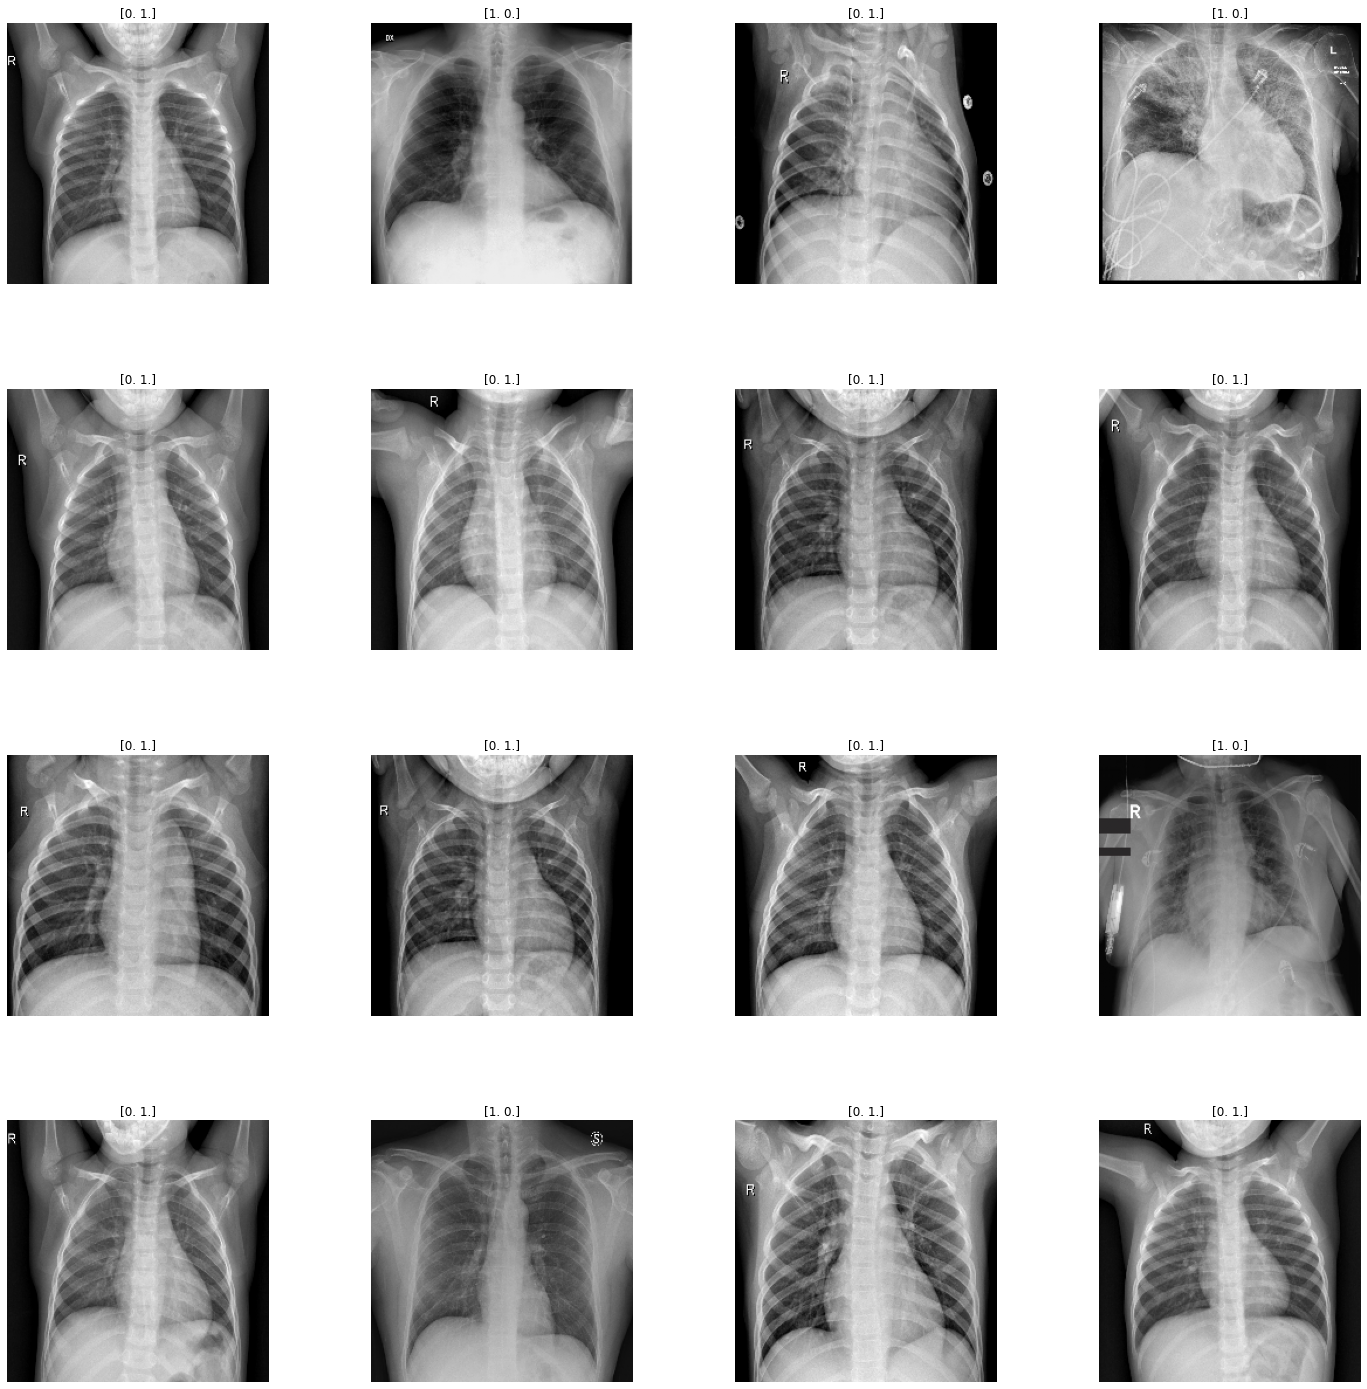

In [29]:
W_grid = 4 #width
L_grid = 4 #length
fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25)) #subplots
axes = axes.ravel()
n_training = len(x_train)
for i in np.arange(0, L_grid*W_grid):
  index = np.random.randint(0, n_training) # pick a random number
  axes[i].imshow(x_train[index])
  axes[i].set_title(y_train[index])
  axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

In [30]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
print("Compiling Starts")
R = model.fit_generator(
    trainAug.flow(x_train, y_train, batch_size=BS),
    steps_per_epoch=len(x_train) // BS,
    validation_data=(x_test, y_test),
    validation_steps=len(x_test) // BS,
    epochs=EPOCHS)


Compiling Starts


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
18/18 [==============================] - 97s 5s/step - loss: 0.7079 - accuracy: 0.6005 - val_loss: 0.5964 - val_accuracy: 0.9800
Epoch 2/10
18/18 [==============================] - 94s 5s/step - loss: 0.6313 - accuracy: 0.6571 - val_loss: 0.5240 - val_accuracy: 0.8800
Epoch 3/10
18/18 [==============================] - 95s 5s/step - loss: 0.5279 - accuracy: 0.8252 - val_loss: 0.4459 - val_accuracy: 0.9600
Epoch 4/10
18/18 [==============================] - 95s 5s/step - loss: 0.4853 - accuracy: 0.8403 - val_loss: 0.3695 - val_accuracy: 1.0000
Epoch 5/10
18/18 [==============================] - 97s 5s/step - loss: 0.3907 - accuracy: 0.9593 - val_loss: 0.3349 - val_accuracy: 0.9600
Epoch 6/10
18/18 [==============================] - 95s 5s/step - loss: 0.3418 - accuracy: 0.9212 - val_loss: 0.2562 - val_accuracy: 1.0000
Epoch 7/10
18/18 [==============================] - 95s 5s/step - loss: 0.2713 - accuracy: 0.9267 - val_loss: 0.2413 - val_accuracy: 0.9800
Epoch 8/10
18/18 [==

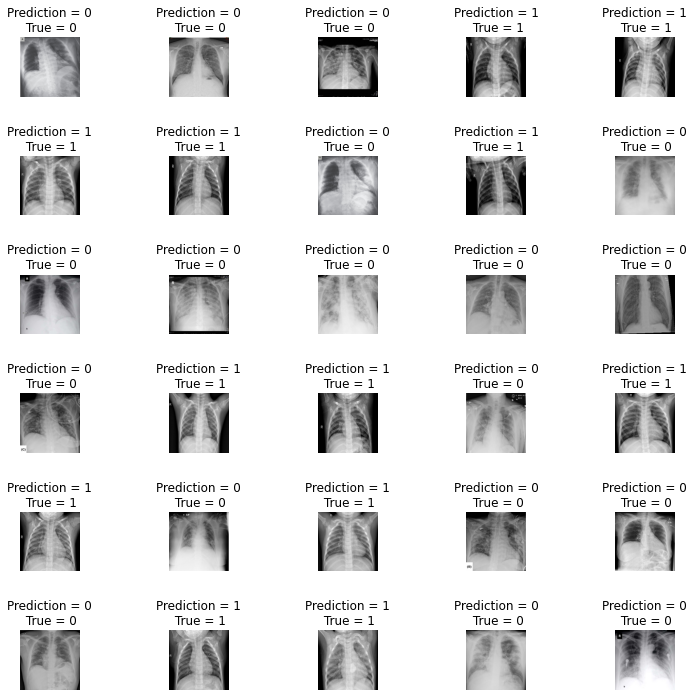

In [31]:
L = 6
W = 5
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()
y_pred = model.predict(x_test, batch_size=BS)
for i in np.arange(0,L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(y_pred.argmax(axis=1)[i], y_test.argmax(axis=1)[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1, hspace=1)

In [32]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test, batch_size=BS)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_test.argmax(axis=1), y_pred,target_names=LB.classes_))

              precision    recall  f1-score   support

       Covid       1.00      1.00      1.00        25
      Normal       1.00      1.00      1.00        25

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test.argmax(axis=1),y_pred)

1.0

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[25  0]
 [ 0 25]]
acc: 1.0000
sensitivity: 1.0000
specificity: 1.0000


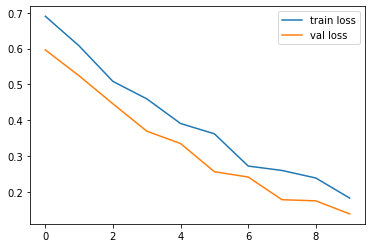

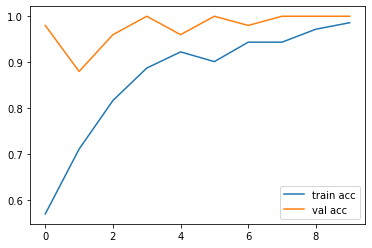

In [36]:
# plot the loss
plt.plot(R.history['loss'], label='train loss')
plt.plot(R.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(R.history['accuracy'], label='train acc')
plt.plot(R.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [37]:
model.save('Covid_model.h5')

Prediction: Corona


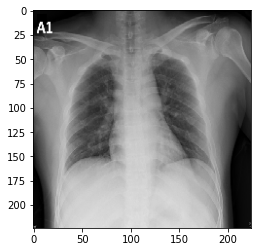

In [38]:
import tensorflow as tf 
from keras.preprocessing import image
model = tf.keras.models.load_model('Covid_model.h5')
from keras.applications.vgg16 import preprocess_input
img = image.load_img('Data/Covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png', target_size=(224, 224)) #insert a random covid-19 x-ray image
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred==[1]:
  print('Prediction: Normal')
else:
  print('Prediction: Corona')


Prediction: Normal


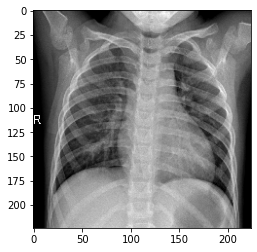

In [39]:
img = image.load_img('Data/Normal/IM-0162-0001.jpeg', target_size=(224, 224)) #insert a random normal x-ray image
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred==[1]:
  print('Prediction: Normal')
else:
  print('Prediction: Corona')